# <center>Assignment 2: Convolutional Neural Network</center>
**<center>Deep Learning | Spring 2022 | Shahid Beheshti University</center>**


Welcome to the **second** programming assignment of the Deep Learning course. 

---

<b>overview</b>:

The goal of this assignment is to get you familiarized with convolutional neural networks. 

First, we will train a CNN model as our base model to solve the Image Colorization task. In general, Image Colorization is a difficult problem e.g. a grayscale image, may have several valid coloring images.

After training, we will add some configurations to it to check their effect and then analyze it.



---
<b>Submission tips</b>:

please review the notes of **this notebook** and whatever is in the **assignment file**.

You can implement other than functions that exist in PY files or change the structure of the notebook based on the given Questions.



<b> What these codes do (exist in PY files)</b>:

There are four PY files that are required to run the CNN.ipynb. Below, the functionality of each PY file are summarized, but more details are provided in the files themselves.

- utils.py: Contain several functions for data preprocessing.
- torch_helper.py: Contain several functions used during the training process. `some of them required to implement`
- model.py: Contains several classes as the models and their blocks (base model and custom U-Net). `required to implement`
- train.py: as the its name show it is for training and validating model. `required to implement`


----
<b>Due date:</b> 10 Ordibehesht 1401 - 11:59 pm
 

 > **_NOTE:_** Alongside the `CNN.ipynb` notebook, there are some python files with the coding parts you need to implement are denoted by: ``` # YOUR CODE #```. Moreover, some <u>Questions</u> are given in the assignment file. 
 
 
 ---


<p style="color:red;">! Probably you need GPU to train your model so you may use your graphic of your system or if you are on Colab don't forget to enable that:</p>
<b><blockquote>Runtime -> Change runtime type -> Hardware Accelator: GPU</blockquote>


# Packages and modules

Let's first import all the packages that you will need during this assignment.

In [2]:
# Pytorch library and other packages

import torch
from utils import *
from train import *


# Constants

In [3]:
colours_dic_addr = 'car_colours_kmeans24.npy'
student_id =98243092 

# other constants if needed

# Dataset


## Prepare Dataset: cifar10

**CIFAR-10** is considered for this assignment which consists of images of size 32x32 pixels. For simplicity, one category of this dataset is considered (automobile).
The input and output of the network will be the grayscale image and RGB image respectively. by **running** the following code blocks get the dataset.

The subset of **24 colors** that are selected to colorize the grayscale images is provided in the car_colours_kmeans24.npy file.

In [4]:
# Download CIFAR dataset
(x_train, y_train), (x_test, y_test) = load_cifar10()

# LOAD THE COLOURS CATEGORIES
colours = np.load(colours_dic_addr, allow_pickle=True, encoding='bytes')



File path: data/cifar-10-batches-py.tar.gz


Complete the <code>model.py</code> to train your model

<br>

<p align="center">
  <img src="images/baseModel.png">
</p>

### Training

Transforming data...
CNN
Beginning training ...
Epoch [1/30], Loss: 2.4039, Time (s): 19
Epoch [1/30], Val Loss: 2.0882, Val Acc: 30.5%, Time(s): 21
Epoch [2/30], Loss: 1.9507, Time (s): 40
Epoch [2/30], Val Loss: 1.8760, Val Acc: 35.4%, Time(s): 42
Epoch [3/30], Loss: 1.8231, Time (s): 61
Epoch [3/30], Val Loss: 1.7819, Val Acc: 38.2%, Time(s): 63
Epoch [4/30], Loss: 1.7588, Time (s): 82
Epoch [4/30], Val Loss: 1.7267, Val Acc: 39.8%, Time(s): 84
Epoch [5/30], Loss: 1.7170, Time (s): 103
Epoch [5/30], Val Loss: 1.6899, Val Acc: 40.6%, Time(s): 105
Epoch [6/30], Loss: 1.6873, Time (s): 124
Epoch [6/30], Val Loss: 1.6696, Val Acc: 41.1%, Time(s): 126
Epoch [7/30], Loss: 1.6643, Time (s): 145
Epoch [7/30], Val Loss: 1.6505, Val Acc: 41.6%, Time(s): 147
Epoch [8/30], Loss: 1.6453, Time (s): 166
Epoch [8/30], Val Loss: 1.6412, Val Acc: 41.6%, Time(s): 167
Epoch [9/30], Loss: 1.6295, Time (s): 186
Epoch [9/30], Val Loss: 1.6246, Val Acc: 42.1%, Time(s): 188
Epoch [10/30], Loss: 1.6159, Time

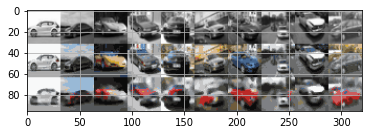

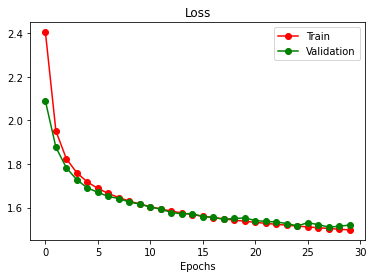

In [5]:
##############################################################################################
#                                 define some arguments if needed to pass                    #
##############################################################################################

class AttrDict(dict):
    def __init__(self, *args, **kwargs):
        super(AttrDict, self).__init__(*args, **kwargs)
        self.__dict__ = self
args = AttrDict()
args_dict = {
              'gpu':True, 
              'valid':False, 
              'checkpoint':"", 
              'colours':'./car_colours_kmeans24.npy', 
              'model':"CNN", 
              'kernel':3,
              'num_filters':32, 
              'learn_rate':0.001, 
              'batch_size':100, 
              'epochs':30, 
              'seed':student_id,
              'plot':True, 
              'category_id':1,
              'experiment_name': 'colourization_cnn',
              'visualize': False,
              'downsize_input':False,
}
args.update(args_dict)
CNNModel = train(args,x_train,y_train,x_test,y_test,colours,"CNN","CNN")

##############################################################################################
#                                 Call train function                                        #
##############################################################################################



## Custom U-Net Model

**Skip connection**

A skip connection in a neural network is a connection which skips one or more layer and connects to a later layer. We will add skip connections to our base model.

We will add skip connection from first layer to last layer, second layer to the second last, etc. This type of skip connection was introduced by [Ronneberger et al.](https://arxiv.org/abs/1505.04597) in U-Net architecture.

The class of this model exists in <code>model.py</code> to complete.

<br>

<p align="center">
  <img src="images/U-Net.png">
</p>

### Training

Transforming data...
UNet
Beginning training ...
Epoch [1/30], Loss: 2.2946, Time (s): 21
Epoch [1/30], Val Loss: 1.9787, Val Acc: 34.0%, Time(s): 22
Epoch [2/30], Loss: 1.8110, Time (s): 44
Epoch [2/30], Val Loss: 1.7777, Val Acc: 38.5%, Time(s): 45
Epoch [3/30], Loss: 1.6745, Time (s): 66
Epoch [3/30], Val Loss: 1.6607, Val Acc: 42.3%, Time(s): 68
Epoch [4/30], Loss: 1.6007, Time (s): 89
Epoch [4/30], Val Loss: 1.5985, Val Acc: 43.9%, Time(s): 91
Epoch [5/30], Loss: 1.5506, Time (s): 112
Epoch [5/30], Val Loss: 1.5445, Val Acc: 45.4%, Time(s): 114
Epoch [6/30], Loss: 1.5119, Time (s): 135
Epoch [6/30], Val Loss: 1.4981, Val Acc: 46.8%, Time(s): 137
Epoch [7/30], Loss: 1.4795, Time (s): 158
Epoch [7/30], Val Loss: 1.4663, Val Acc: 47.9%, Time(s): 160
Epoch [8/30], Loss: 1.4521, Time (s): 181
Epoch [8/30], Val Loss: 1.4428, Val Acc: 48.4%, Time(s): 182
Epoch [9/30], Loss: 1.4285, Time (s): 203
Epoch [9/30], Val Loss: 1.4211, Val Acc: 49.0%, Time(s): 205
Epoch [10/30], Loss: 1.4077, Tim

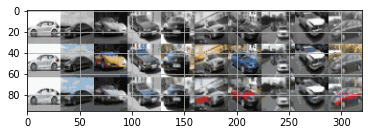

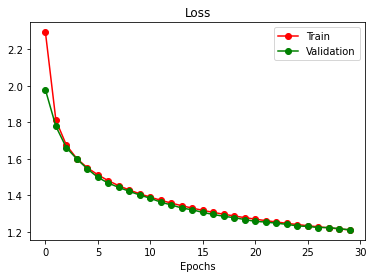

In [6]:
##############################################################################################
#                                 define some arguments if needed to pass                    #
##############################################################################################

class AttrDict(dict):
    def __init__(self, *args, **kwargs):
        super(AttrDict, self).__init__(*args, **kwargs)
        self.__dict__ = self
args = AttrDict()
args_dict = {
              'gpu':True, 
              'valid':False, 
              'checkpoint':"", 
              'colours':'./car_colours_kmeans24.npy', 
              'model':"UNet", 
              'kernel':3,
              'num_filters':32, 
              'learn_rate':0.001, 
              'batch_size':100, 
              'epochs':30, 
              'seed':student_id,
              'plot':True, 
              'category_id':1,
              'experiment_name': 'colourization_cnn',
              'visualize': False,
              'downsize_input':False,
}
args.update(args_dict)
UNetModel = train(args,x_train,y_train,x_test,y_test,colours,"Unet","Unet")

##############################################################################################
#                                 call the train function (train.py)                         #
##############################################################################################

## Extra Points: U-Net with Residual block

Based on the concept of Residual Learning, convert DownConv, UpConv and BottelNeck to Residual block.Then modify the `train` function to get result.

<br>
<p align="center">
  <img src="images/ResidualBlock.png">
</p>

### Training

Transforming data...
ResNet
Beginning training ...
Epoch [1/25], Loss: 1.9707, Time (s): 166
Epoch [1/25], Val Loss: 1.5878, Val Acc: 46.7%, Time(s): 175
Epoch [2/25], Loss: 1.4691, Time (s): 343
Epoch [2/25], Val Loss: 1.3929, Val Acc: 52.1%, Time(s): 352
Epoch [3/25], Loss: 1.3176, Time (s): 519
Epoch [3/25], Val Loss: 1.2256, Val Acc: 58.6%, Time(s): 528
Epoch [4/25], Loss: 1.2189, Time (s): 693
Epoch [4/25], Val Loss: 1.1255, Val Acc: 62.6%, Time(s): 703
Epoch [5/25], Loss: 1.1509, Time (s): 868
Epoch [5/25], Val Loss: 1.0679, Val Acc: 64.5%, Time(s): 877
Epoch [6/25], Loss: 1.1036, Time (s): 1042
Epoch [6/25], Val Loss: 1.0293, Val Acc: 65.3%, Time(s): 1052
Epoch [7/25], Loss: 1.0665, Time (s): 1217
Epoch [7/25], Val Loss: 0.9901, Val Acc: 66.6%, Time(s): 1226
Epoch [8/25], Loss: 1.0397, Time (s): 1391
Epoch [8/25], Val Loss: 0.9687, Val Acc: 67.2%, Time(s): 1400
Epoch [9/25], Loss: 1.0195, Time (s): 1566
Epoch [9/25], Val Loss: 0.9446, Val Acc: 68.1%, Time(s): 1576
Epoch [10/25],

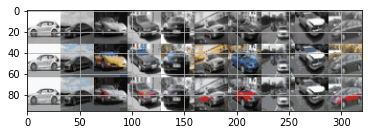

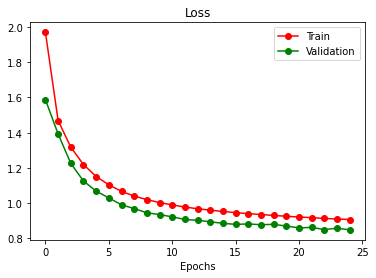

In [7]:
##############################################################################################
#                                 define some arguments if needed to pass                    #
##############################################################################################

class AttrDict(dict):
    def __init__(self, *args, **kwargs):
        super(AttrDict, self).__init__(*args, **kwargs)
        self.__dict__ = self
args = AttrDict()
args_dict = {
              'gpu':False, 
              'valid':False, 
              'checkpoint':"", 
              'colours':'./car_colours_kmeans24.npy', 
              'model':"ResNet", 
              'kernel':3,
              'num_filters':32, 
              'learn_rate':0.001, 
              'batch_size':100, 
              'epochs':25, 
              'seed':student_id,
              'plot':True, 
              'category_id':1,
              'experiment_name': 'colourization_cnn',
              'visualize': False,
              'downsize_input':False,
}
args.update(args_dict)
ResNetModel = train(args,x_train,y_train,x_test,y_test,colours,"ResNet","ResNet")

##############################################################################################
#                                 call the train function (train.py)                         #
##############################################################################################

# Refrences

- https://ai.stanford.edu/~syyeung/cvweb/tutorial1.html
- https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html
- http://papers.nips.cc/paper/7515-how-does-batch-normalization-help-optimization.pdf
- Intro to optimization in deep learning: Busting the myth about batch normalization [[link](https://blog.paperspace.com/busting-the-myths-about-batch-normalization/)]
- Why Does Batch Normalization Work? [[link](https://abay.tech/blog/2018/07/01/why-does-batch-normalization-work/)]
- https://arxiv.org/abs/1505.04597
